# Kaggle Competition: House Prices: Advanced Regression Techniques

El objetivo de [esta competición](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview) es **predecir el precio de las casas** en Ames, Iowa, utilizando un conjunto de datos de entrenamiento que contiene 79 variables. La métrica de evaluación es el **error cuadrático medio** (RMSE).

![image](https://www.kaggle.com/competitions/5407/images/header)


## 1. Cargar los datos

Como siempre en un proyecto de Machine Learning, lo primero que debemos hacer es cargar los datos. Para ello, seguiremos los siguientes pasos:

1. Darnos de alta en la plataforma de [Kaggle](https://www.kaggle.com/)
2. [Registrarnos en la competición](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview).
3. Descargar los datos. Para ello nos dirigimos a la pestaña `Data` y descargamos el zip con los archivos: `train.csv`, `test.csv`, `data_description.txt` y `sample_submission.csv`, 
4. Los colocamos dentro de una carpeta llamada `data` en la raíz del proyecto. Recuerda que no subimos los datos a GitHub.
5. Cargamos los datos en un DataFrame de pandas.

In [18]:
import pandas as pd


TRAIN_CSV = '../data/house_model/train.csv'
TEST_CSV = '../data/house_model/test.csv'


train_df = pd.read_csv(TRAIN_CSV)
test_df = pd.read_csv(TEST_CSV)
all_data_df = pd.concat([train_df, test_df], keys=['train', 'test'])
all_data_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
train 0   1          60       RL         65.0     8450   Pave   NaN      Reg   
      1   2          20       RL         80.0     9600   Pave   NaN      Reg   
      2   3          60       RL         68.0    11250   Pave   NaN      IR1   
      3   4          70       RL         60.0     9550   Pave   NaN      IR1   
      4   5          60       RL         84.0    14260   Pave   NaN      IR1   

        LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
train 0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
      1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
      2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
      3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
      4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   

        MoSold YrSold  SaleType  SaleCondition  SalePrice  
train 0      2   2008        WD         Normal   208500.0  
      1      5   2007        WD         Normal   181500.0  
      2      9   2008        WD         Normal   223500.0  
      3      2   2006        WD        Abnorml   140000.0  
      4     12   2008        WD         Normal   250000.0  

[5 rows x 81 columns]

Para este ejercicio vamos a simplificar el problema y vamos a reducir el número de variables a utilizar a un set de 10 variables más manejables.

| **Nombre**        | **Descripción**                                                                                                   | **Valoración**                                                                                                                                                                     |
|---------------|---------------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **OverallQual**   | Calificación de la calidad general de los materiales y acabados (1 a 10).                                     | Es crucial para la predicción del precio, ya que la calidad de construcción y acabados afecta directamente la percepción de valor y atractivo de la propiedad.                   |
| **GrLivArea**     | Área habitable sobre el nivel del suelo en pies cuadrados.                                                    | Un mayor espacio habitable es más deseable y puede alojar a más personas, incrementando la utilidad y valor de la casa.                                                        |
| **Neighborhood**  | Vecindario dentro de los límites de la ciudad de Ames.                                                        | La ubicación puede influir en la seguridad, acceso a servicios, escuelas y otros factores que afectan la calidad de vida, siendo un factor clave en el valor de la propiedad.    |
| **YearBuilt**     | Año de construcción de la casa.                                                                               | Las casas más nuevas suelen tener instalaciones modernas y menos problemas de mantenimiento, lo cual puede elevar el precio de la propiedad.                                   |
| **GarageCars**    | Capacidad del garaje en términos de número de coches.                                                         | Es un indicador de conveniencia y almacenamiento adicional, factores valorados por los compradores, especialmente en áreas suburbanas.                                          |
| **TotalBsmtSF**   | Área total del sótano en pies cuadrados.                                                                      | Un sótano más grande puede incrementar el espacio utilizable, lo que es atractivo para los compradores y puede aumentar el valor de la propiedad.                               |
| **KitchenQual**   | Califica la calidad de la cocina (Ex a Po).                                                                   | La calidad de la cocina puede influir notablemente en la decisión de compra y la disposición a pagar más, ya que es una de las áreas más importantes de una casa.              |
| **FullBath**      | Número de baños completos sobre el nivel del suelo.                                                           | Más baños completos incrementan la comodidad y funcionalidad de la vivienda, especialmente en familias numerosas, siendo un aspecto muy valorado.                               |
| **MSZoning**      | Clasificación general de la zona de la propiedad (Agrícola, Comercial, Residencial, etc.).                    | Afecta las regulaciones y el uso permitido de la propiedad, influyendo en su valor y en las posibilidades de desarrollo o remodelación.                                         |
| **LotArea**       | Tamaño del lote en pies cuadrados.                                                                            | Un terreno más grande puede ofrecer más privacidad, espacio para actividades al aire libre o futuras ampliaciones de la casa, aumentando su atractivo y valor.                  |
| **LotArea**       | Tamaño del lote en pies cuadrados.                                                                            | Un terreno más grande puede ofrecer más privacidad, espacio para actividades al aire libre o futuras ampliaciones de la casa, aumentando su atractivo y valor.                  |


In [ ]:
selected_columns = [
    "OverallQual",
    "GrLivArea",
    "Neighborhood",
    "YearBuilt",
    "GarageCars",
    "TotalBsmtSF",
    "KitchenQual",
    "FullBath",
    "MSZoning",
    "LotArea",
    "SaleCondition",
    "Utilities",
    "SalePrice", # incluímos la variable objetivo
]

all_data_df = all_data_df[selected_columns]
all_data_df.head()

OverallQual  GrLivArea Neighborhood  YearBuilt  GarageCars  \
train 0            7       1710      CollgCr       2003         2.0   
      1            6       1262      Veenker       1976         2.0   
      2            7       1786      CollgCr       2001         2.0   
      3            7       1717      Crawfor       1915         3.0   
      4            8       2198      NoRidge       2000         3.0   

         TotalBsmtSF KitchenQual  FullBath MSZoning  LotArea  YrSold  \
train 0        856.0          Gd         2       RL     8450    2008   
      1       1262.0          TA         2       RL     9600    2007   
      2        920.0          Gd         2       RL    11250    2008   
      3        756.0          Gd         1       RL     9550    2006   
      4       1145.0          Gd         2       RL    14260    2008   

        SaleCondition Utilities  SalePrice  
train 0        Normal    AllPub   208500.0  
      1        Normal    AllPub   181500.0  
      2        Normal    AllPub   223500.0  
      3       Abnorml    AllPub   140000.0  
      4        Normal    AllPub   250000.0

## 2. Explorar los datos (EDA)

Una vez que hemos cargado los datos, el siguiente paso es explorarlos. Para ello, seguiremos los siguientes pasos:


1. Mostrar un resumen de los datos.


In [20]:
all_data_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2919 entries, ('train', np.int64(0)) to ('test', np.int64(1458))
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   OverallQual    2919 non-null   int64  
 1   GrLivArea      2919 non-null   int64  
 2   Neighborhood   2919 non-null   object 
 3   YearBuilt      2919 non-null   int64  
 4   GarageCars     2918 non-null   float64
 5   TotalBsmtSF    2918 non-null   float64
 6   KitchenQual    2918 non-null   object 
 7   FullBath       2919 non-null   int64  
 8   MSZoning       2915 non-null   object 
 9   LotArea        2919 non-null   int64  
 10  YrSold         2919 non-null   int64  
 11  SaleCondition  2919 non-null   object 
 12  Utilities      2917 non-null   object 
 13  SalePrice      1460 non-null   float64
dtypes: float64(3), int64(6), object(5)
memory usage: 371.7+ KB


2. Mostrar un resumen de los datos categóricos.


In [21]:
all_data_df.describe(include='object')

,Neighborhood,KitchenQual,MSZoning,SaleCondition,Utilities
count,2919,2918,2915,2919,2917
unique,25,4,5,6,2
top,NAmes,TA,RL,Normal,AllPub
freq,443,1492,2265,2402,2916


3. Mostrar un resumen de los datos numéricos.


In [22]:
all_data_df.describe()

,OverallQual,GrLivArea,YearBuilt,GarageCars,TotalBsmtSF,FullBath,LotArea,YrSold,SalePrice
count,2919.000000,2919.000000,2919.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,6.089072,1500.759849,1971.312778,1.766621,1051.777587,1.568003,10168.114080,2007.792737,180921.195890
std,1.409947,506.051045,30.291442,0.761624,440.766258,0.552969,7886.996359,1.314964,79442.502883
min,1.000000,334.000000,1872.000000,0.000000,0.000000,0.000000,1300.000000,2006.000000,34900.000000
25%,5.000000,1126.000000,1953.500000,1.000000,793.000000,1.000000,7478.000000,2007.000000,129975.000000
50%,6.000000,1444.000000,1973.000000,2.000000,989.500000,2.000000,9453.000000,2008.000000,163000.000000
75%,7.000000,1743.500000,2001.000000,2.000000,1302.000000,2.000000,11570.000000,2009.000000,214000.000000
max,10.000000,5642.000000,2010.000000,5.000000,6110.000000,4.000000,215245.000000,2010.000000,755000.000000


4. Mostrar un resumen de los datos nulos.


In [23]:
all_data_df.isnull().sum()

OverallQual         0
GrLivArea           0
Neighborhood        0
YearBuilt           0
GarageCars          1
TotalBsmtSF         1
KitchenQual         1
FullBath            0
MSZoning            4
LotArea             0
YrSold              0
SaleCondition       0
Utilities           2
SalePrice        1459
dtype: int64

5. Visualizar la distribución de la variable objetivo.


Text(0.5, 1.0, 'Distribución de la variable objetivo: SalePrice')

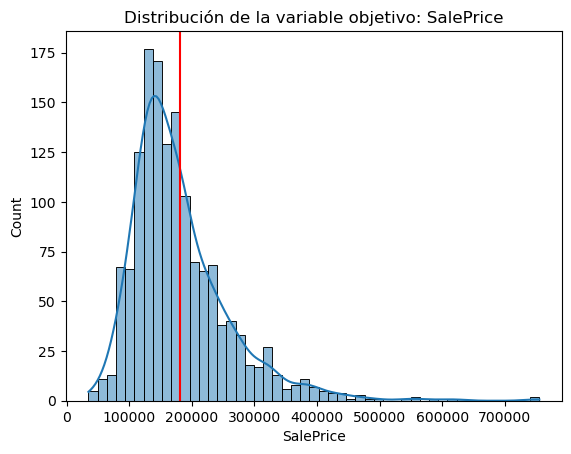

In [24]:
import seaborn as sns


y = all_data_df['SalePrice']
ax = sns.histplot(y, kde=True)
ax.axvline(y.mean(), color='red')
ax.set_title('Distribución de la variable objetivo: SalePrice')

6. Visualizar la correlación entre las variables numéricas.


Text(0.5, 1.0, 'Matriz de correlación')

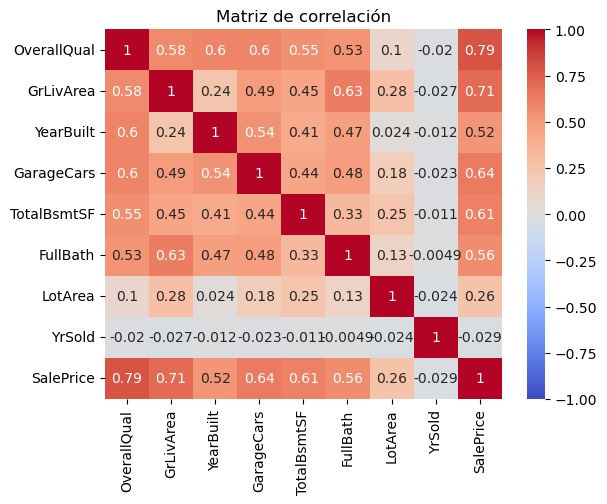

In [25]:
corr_matrix = all_data_df.corr(numeric_only=True)
ax = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
ax.set_title('Matriz de correlación')

## 3. Preprocesamiento de los datos

Una vez que hemos explorado los datos, el siguiente paso es preprocesarlos. Para ello, seguiremos los siguientes pasos:

1. Tratar los datos nulos.
2. Codificar las variables categóricas.
3. Normalizar las variables numéricas.

In [26]:
X = all_data_df.drop(columns='SalePrice')
y = all_data_df['SalePrice']

### 3.1 Tratar los datos nulos

Vamos a ver cuantos datos nulos tenemos

In [27]:
X.isnull().sum()

OverallQual      0
GrLivArea        0
Neighborhood     0
YearBuilt        0
GarageCars       1
TotalBsmtSF      1
KitchenQual      1
FullBath         0
MSZoning         4
LotArea          0
YrSold           0
SaleCondition    0
Utilities        2
dtype: int64

Vamos a imputar los valores nulos de las variables categóricas con la moda y los valores nulos de las variables numéricas con la media.

In [28]:
# fill GarageCars, TotalBsmtSF, MSZoning and KitchenQual with the mode

def fill_df_column_with_mode(df, column):
    mode = df[column].mode()[0]
    df[column] = df[column].fillna(mode)
    return df

X = fill_df_column_with_mode(X, 'GarageCars')
X = fill_df_column_with_mode(X, 'TotalBsmtSF')
X = fill_df_column_with_mode(X, 'MSZoning')
X = fill_df_column_with_mode(X, 'KitchenQual')

Confirmamos que no hay valores nulos.

In [29]:
X.isnull().sum()

OverallQual      0
GrLivArea        0
Neighborhood     0
YearBuilt        0
GarageCars       0
TotalBsmtSF      0
KitchenQual      0
FullBath         0
MSZoning         0
LotArea          0
YrSold           0
SaleCondition    0
Utilities        2
dtype: int64

### 3.2 Normalizar las variables numéricas

Normalizar las variables numéricas es un paso importante en el preprocesamiento de los datos ya que permite que las variables tengan la misma escala, evitando que unas variables tengan más peso que otras en el modelo de Machine Learning. Para ello, utilizaremos el `StandardScaler` de `scikit-learn`.

El `StandardScaler` transforma las variables de forma que tengan media 0 y desviación estándar 1. Se diferencia del `MinMaxScaler` en que no transforma las variables a un rango específico, sino que las normaliza.

Veamos las variables numéricas que vamos a normalizar.

In [30]:
X.describe()

,OverallQual,GrLivArea,YearBuilt,GarageCars,TotalBsmtSF,FullBath,LotArea,YrSold
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,6.089072,1500.759849,1971.312778,1.766701,1051.417266,1.568003,10168.114080,2007.792737
std,1.409947,506.051045,30.291442,0.761506,441.120498,0.552969,7886.996359,1.314964
min,1.000000,334.000000,1872.000000,0.000000,0.000000,0.000000,1300.000000,2006.000000
25%,5.000000,1126.000000,1953.500000,1.000000,793.000000,1.000000,7478.000000,2007.000000
50%,6.000000,1444.000000,1973.000000,2.000000,989.000000,2.000000,9453.000000,2008.000000
75%,7.000000,1743.500000,2001.000000,2.000000,1302.000000,2.000000,11570.000000,2009.000000
max,10.000000,5642.000000,2010.000000,5.000000,6110.000000,4.000000,215245.000000,2010.000000


Vamos a normalizar las variables numéricas utilizando el `StandardScaler`.

In [ ]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

numeric_columns = ["GrLivArea", "YearBuilt", "TotalBsmtSF", "LotArea"]
X_numeric_df = X[numeric_columns]
X_numeric_scaled_data = scaler.fit_transform(X_numeric_df)

# keep indexes "train" and "test" to split the data later
X_numeric_scaled_df = pd.DataFrame(
    X_numeric_scaled_data,
    index=X_numeric_df.index,
    columns=X_numeric_df.columns,
)
X_numeric_scaled_df.head()

GrLivArea  YearBuilt  TotalBsmtSF   LotArea    YrSold
train 0   0.413547   1.046258    -0.443078 -0.217879  0.157646
      1  -0.471891   0.154764     0.477463 -0.072044 -0.602962
      2   0.563755   0.980221    -0.297968  0.137197  0.157646
      3   0.427382  -1.859351    -0.669812 -0.078385 -1.363569
      4   1.378042   0.947203     0.212184  0.518903  0.157646

### 3.3 Codificar las variables categóricas

Recordemos que las variables categóricas deben ser codificadas para poder ser utilizadas en un modelo de Machine Learning. Para ello, utilizaremos el `LabelEncoder` de `scikit-learn`. Primero veamos cuales son las variables categóricas.

In [32]:
from sklearn.preprocessing import LabelEncoder


def label_encode_column(df, column):
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    return df

In [33]:
X = label_encode_column(X, 'Neighborhood')
X = label_encode_column(X, 'MSZoning')
X = label_encode_column(X, 'KitchenQual')
X = label_encode_column(X, 'SaleCondition')
X = label_encode_column(X, 'Utilities')

Veamos cómo han quedado codificadas las variables categóricas.

In [34]:
categorical_columns = [
    "OverallQual",
    "GarageCars",
    "Neighborhood",
    "MSZoning",
    "KitchenQual",
    "FullBath",
    "SaleCondition",
    "Utilities"
]
categorical_df = X[categorical_columns]
categorical_df.head()

OverallQual  GarageCars  Neighborhood  MSZoning  KitchenQual  \
train 0            7         2.0             5         3            2   
      1            6         2.0            24         3            3   
      2            7         2.0             5         3            2   
      3            7         3.0             6         3            2   
      4            8         3.0            15         3            2   

         FullBath  SaleCondition  Utilities  
train 0         2              4          0  
      1         2              4          0  
      2         2              4          0  
      3         1              0          0  
      4         2              4          0

Ahora vamos a unir todas las variables en un solo DataFrame.

In [35]:
X_clean_df = pd.concat([X_numeric_scaled_df, categorical_df], axis=1)
X_clean_df

GrLivArea  YearBuilt  TotalBsmtSF   LotArea    YrSold  \
train 0      0.413547   1.046258    -0.443078 -0.217879  0.157646   
      1     -0.471891   0.154764     0.477463 -0.072044 -0.602962   
      2      0.563755   0.980221    -0.297968  0.137197  0.157646   
      3      0.427382  -1.859351    -0.669812 -0.078385 -1.363569   
      4      1.378042   0.947203     0.212184  0.518903  0.157646   
...               ...        ...          ...       ...       ...   
test  1454  -0.807883  -0.043346    -1.145954 -1.043937 -1.363569   
      1455  -0.807883  -0.043346    -1.145954 -1.049263 -1.363569   
      1456  -0.546995  -0.373528     0.391304  1.246808 -1.363569   
      1457  -1.049006   0.683057    -0.316107  0.034605 -1.363569   
      1458   0.986710   0.716075    -0.125650 -0.068620 -1.363569   

            OverallQual  GarageCars  Neighborhood  MSZoning  KitchenQual  \
train 0               7         2.0             5         3            2   
      1               6         2.0            24         3            3   
      2               7         2.0             5         3            2   
      3               7         3.0             6         3            2   
      4               8         3.0            15         3            2   
...                 ...         ...           ...       ...          ...   
test  1454            4         0.0            10         4            3   
      1455            4         1.0            10         4            3   
      1456            5         2.0            11         3            3   
      1457            5         0.0            11         3            3   
      1458            7         3.0            11         3            3   

            FullBath  SaleCondition  Utilities  
train 0            2              4          0  
      1            2              4          0  
      2            2              4          0  
      3            1              0          0  
      4            2              4          0  
...              ...            ...        ...  
test  1454         1              4          0  
      1455         1              0          0  
      1456         1              0          0  
      1457         1              4          0  
      1458         2              4          0  

[2919 rows x 13 columns]

## 4. Split de los datos

Al estar en Kaggle y tener los datos de entrenamiento y test separados, no necesitamos dividir los datos en entrenamiento y test. Sin embargo, **vamos a dividir los datos de entrenamiento en entrenamiento y validación** para poder evaluar el rendimiento de nuestro modelo.

In [36]:
from sklearn.model_selection import train_test_split


SPLIT_RATIO = 0.2
SEED = 42


# estos son los datos limpios que usaremos para predecir y enviar a Kaggle
X_test = X_clean_df.xs('test')

# estos son los datos que usaremos para entrenar y validar nuestro modelo
X_train = X_clean_df.xs('train')
y_train = y.loc['train']

# dividimos los datos de entrenamiento en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=SPLIT_RATIO, random_state=SEED
)

## 5. Entrenar un modelo

Una vez que hemos preprocesado los datos, el siguiente paso es entrenar un modelo. En este caso **se trata de un problema de regresión**, por lo que vamos a utilizar un modelo de regresión. En concreto, vamos a utilizar un **modelo de regresión lineal**. Este modelo se encuentra en la librería `scikit-learn` dentro de la clase `LinearRegression`.

In [37]:
from sklearn.linear_model import LinearRegression


model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## 6. Evaluar el modelo

Una vez que hemos entrenado el modelo, el siguiente paso es evaluarlo. Para ello, vamos a calcular el **error cuadrático medio** (RMSE) en el conjunto de validación.

In [39]:
from sklearn.metrics import root_mean_squared_error

# obtenemos las predicciones para los datos de validación
y_pred = model.predict(X_val)

# calculamos el error cuadrático medio comparando las predicciones con los valores reales
mse = root_mean_squared_error(y_val, y_pred)
f"Mean Squared Error: {mse:.2f}"

'Mean Squared Error: 37481.05'

## 7. Envío de los datos

Finalmente, una vez que hemos entrenado y evaluado el modelo, el último paso es predecir los precios de las casas en el conjunto de test y enviar los resultados a Kaggle para obtener la puntuación final.

¡Vamos a por ello! 🚀

El archivo `sample_submission.csv` contiene el formato en el que debemos enviar nuestras predicciones. Vamos a cargarlo para ver cómo debemos estructurar nuestros datos.

In [52]:
SAMPLE_SUBMISSION_CSV = '../data/house_model/sample_submission.csv'
sample_submission_df = pd.read_csv(SAMPLE_SUBMISSION_CSV)
sample_submission_df.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


Vemos que tiene 2 columnas: `Id` y `SalePrice`. `Id` es el identificador de la casa y `SalePrice` es el precio que debemos predecir. vamos a obtener las predicciones de nuestro modelo y a guardarlas en un DataFrame con esas columnas.

In [53]:
test_predictions = model.predict(X_test)
test_ids = test_df['Id']
submission_data = {
    'Id': test_ids,
    'SalePrice': test_predictions,
}
submission_df = pd.DataFrame(submission_data)
submission_df.head()

,Id,SalePrice
0,1461,110646.264321
1,1462,171210.816461
2,1463,166105.830946
3,1464,194887.726001
4,1465,219095.871039


Guardamos las predicciones en un archivo CSV para enviar a Kaggle.

In [54]:
submission_df.to_csv('../data/house_model/submission.csv', index=False)